# Dataset Download

This blocks shows on how can we download dataset from kaggle and use that on our local PC or colab.

1. Have Kaggle Token uploaded to you colab or dowloaded into a Kaggle folder.
2. install kaggle.
3. change its permission for you only.
4. Paste the name of the author and a link to the dataset to download the dataset.
5. unzip the dataset for you own use.

In [ ]:
# prompt: Downloading data from kaggle

!pip install -q kaggle
!chmod 600 ./kaggle/kaggle.json
!kaggle datasets download -d pandrii000/hituav-a-highaltitude-infrared-thermal-dataset
!unzip hituav-a-highaltitude-infrared-thermal-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: hit-uav/images/train/0_110_70_0_08486.jpg  
  inflating: hit-uav/images/train/0_110_80_0_03729.jpg  
  inflating: hit-uav/images/train/0_110_80_0_03734.jpg  
  inflating: hit-uav/images/train/0_110_80_0_08491.jpg  
  inflating: hit-uav/images/train/0_110_80_0_08512.jpg  
  inflating: hit-uav/images/train/0_110_80_0_08518.jpg  
  inflating: hit-uav/images/train/0_110_80_0_08520.jpg  
  inflating: hit-uav/images/train/0_110_80_0_08522.jpg  
  inflating: hit-uav/images/train/0_110_90_0_03784.jpg  
  inflating: hit-uav/images/train/0_110_90_0_03802.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08527.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08529.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08532.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08536.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08542.jpg  
  inflating: hit-uav/images/train/0_110_90_0_08545.jpg  
  inflating: hit-uav/images/train/0_1

In [ ]:
# prompt: rename a folder
!mv hit-uav dataset

# Important Note

**Must Check the path of the images before you start your inference or training Path may be changed for you**

The yaml should look like this:

    path: /content/dataset

    train: /content/dataset/images/train

    val: /content/dataset/images/val

    test: /content/dataset/images/test

    names:

      0: Person

      1: Car

      2: Bicycle

      3: OtherVehicle

      4: DontCare

      5: nc

# Exploring Dataset

This section is about discussing the importance of the dataset, and ploting few of the sample images.

few points:
1. dataset is already converted into yolo fromat.
2. Dataset has Images, labels and a yaml file already.
3. Yolo does the necessary augmentation for the data on its own so no further augmentation is needed.

So on these points we can't preprocess the data further even if we want to. If you want to learn more about dataset you can visit these links:
1. https://www.kaggle.com/datasets/pandrii000/hituav-a-highaltitude-infrared-thermal-dataset [Kaggle]
2. https://datasetninja.com/hit-uav [datasetninja]
3. https://deepai.org/publication/hit-uav-a-high-altitude-infrared-thermal-dataset-for-unmanned-aerial-vehicles [deepai]

## Why choose this dataset?
The HIT-UAV dataset is a groundbreaking contribution to the field of aerial infrared object detection, particularly for military applications. As the first publicly available high-altitude infrared thermal UAV dataset, it offers unique advantages that can significantly enhance military surveillance, reconnaissance, and threat detection capabilities.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import random

def plot_images_with_bboxes(image_dir, label_dir, n=4):
    """
    Plots n images from a directory with bounding boxes based on YOLO format labels.

    Args:
      image_dir: Path to the directory containing images.
      label_dir: Path to the directory containing YOLO format labels.
      n: The number of images to plot.
    """

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    num_images = min(n, len(image_files))  # Ensure we don't try to plot more images than exist

    if num_images == 0:
        print("No images found in the specified directory.")
        return

    selected_images = random.sample(image_files, num_images)

    rows = num_images//2
    cols = 2 if num_images > 1 else 1
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(image_dir, image_file)
        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)

        try:
          img = plt.imread(image_path)
          ax = axes[i // 2, i % 2] if num_images > 1 else axes
          ax.imshow(img)
          ax.axis('off')

          with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())

                # Convert YOLO format to pixel coordinates
                image_w, image_h = img.shape[1], img.shape[0]
                x_min = int((x_center - width / 2) * image_w)
                y_min = int((y_center - height / 2) * image_h)
                x_max = int((x_center + width / 2) * image_w)
                y_max = int((y_center + height / 2) * image_h)

                rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
        except FileNotFoundError:
            print(f"Label file not found for {image_file}. Skipping this image.")
            continue
        except Exception as e:
            print(f"An error occurred while processing {image_file}: {e}")
            continue
    plt.tight_layout()
    plt.show()

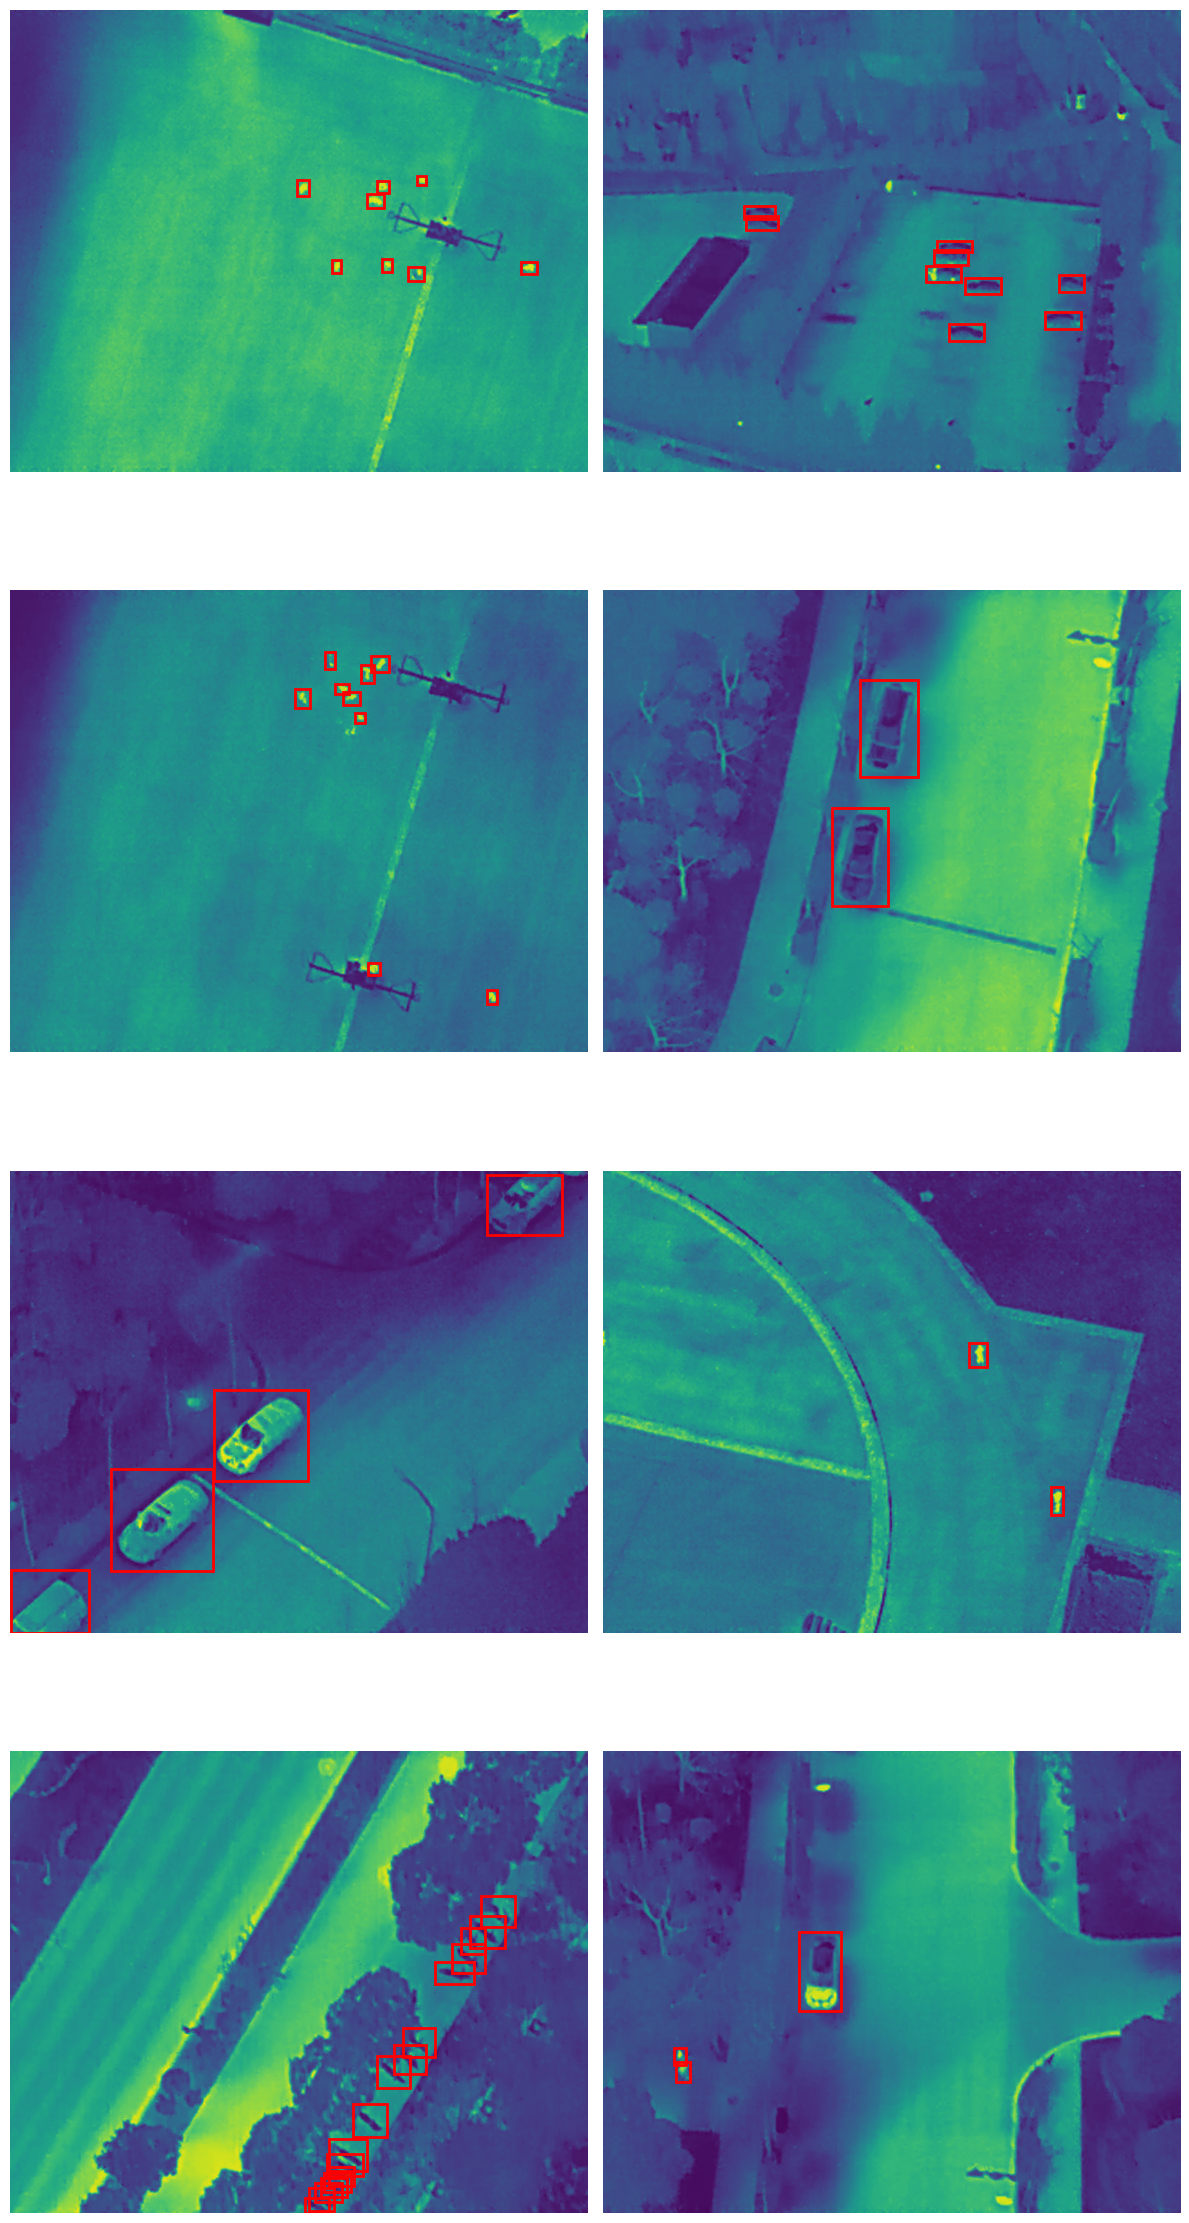

In [ ]:
image_directory = "./dataset/images/test"
label_directory = "./dataset/labels/test"
plot_images_with_bboxes(image_directory, label_directory, n=8)

# Installation of ultralytics

This phase will help us to install YOLO for your custom object detection training. This part will consist of few steps:
1. Install ultralytics
2. Use `tunner` class to find out the best hyper parameters that you will need for you train class.
3. Train the model on the dataset and export the model in `.pt` and `.engine` or `.onix` format for API developement.

In [ ]:
# installation of ultralytics

!pip install  -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00


In [ ]:
# From the offical ultralytics website that explains how to use tunner to find the optimal hyperparameters by using Genetic algo

from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("yolo11n.pt")

# Define search space the parameter you want to experiment with
search_space = {
    "lr0": (1e-5, 1e-1),
    "momentum": (0.6, 0.98),
    "weight_decay": (0.0, 0.001),
    "warmup_epochs": (0.0, 5.0),
    "warmup_momentum": (0.0, 5.0),
    "warmup_bias_lr": (0.0, 0.95),
    "hsv_h": (0.0, 0.1),
    "hsv_s": (0.0, 0.9),
    "hsv_v": (0.0, 0.9),
    "degrees": (0.0, 45.0),
    "translate": (0.0, 0.9),
    "scale": (0.0, 0.9),
    "shear": (0.0, 10.0),
    "perspective": (0.0, 0.001),
    "flipud": (0.5, 1.0), #Probability of vertical image flip during training. Useful for overhead/aerial imagery
    "fliplr": (0.5, 1.0),
    "mosaic": (0, 1),
    "mixup": (0.0, 1.0),
    "copy_paste": (0.0, 1.0),
}

# Tune hyperparameters on dataset for 50 epochs 200 time and then save the results.
model.tune(
    data="./dataset/dataset.yaml",
    epochs=25,
    iterations=5,
    optimizer="AdamW",
    space=search_space,
    plots=True,
    save=True,
    val=True,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.6MB/s]

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.5, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/5 iterations complete ✅ (1032.02s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.33597 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.72837, 'metrics/recall(B)': 0.4705, 'metrics/mAP50(B)': 0.54073, 'metrics/mAP50-95(B)': 0.31322, 'val/box_loss': 1.36871, 'val/cls_loss': 0.87425, 'val/dfl_loss': 1.02538, 'fitness': 0.33597}
Tuner: Best fitness model is runs/detect/train
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune/best_hyperparameters.yaml'

lr0: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.5
fliplr: 0.5
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0

Tuner: Starting iteration 2/5 with hyperparameters: {'lr0': 0.00678, 'momentum': 0.98, 'weight

## Warning/Note:

must check that is the tarining been done or not, if you are encountring any `error or warning` regarding `training` that means there is most probally a `path issue` you must `check` the path again and `rerun` the code once more time.

# Exporting Data

This cell will zip and save all the important results and will zip then in the current folder and then we can download them for futher use.

In [ ]:
# zipping the results and plots for explaining the model accuracy

!zip -r runs.zip /content/runs                   # zip overall result
!zip -r best.zip /content/runs/detect/train4     # give the folder with best performance
!zip -r tune.zip /content/runs/detect/tune       # get tunning result

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch1890.jpg (deflated 10%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 33%)
  adding: content/runs/detect/train/events.out.tfevents.1739785996.26c7062257ab.1297.0 (deflated 92%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/R_curve.png (deflated 9%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/results.csv (deflated 58%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 8%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 4%)
  adding: content/runs/detect/train/PR_curve.png (deflated 9%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
  adding: conten

# Note:

This code was ran on google colab so you might have to check the paths, plus due to limited time and resources this code was only ran for 5 iterations and 25 epochs for each iteration, the best practice is to use this method for 50 more iterations to get the best result and fit you can.